In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
#Loading the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [244]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [245]:
# --- Dataset Report ---
ProfileReport(df, title='Customer Segmentation:', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

<function matplotlib.pyplot.show(close=None, block=None)>

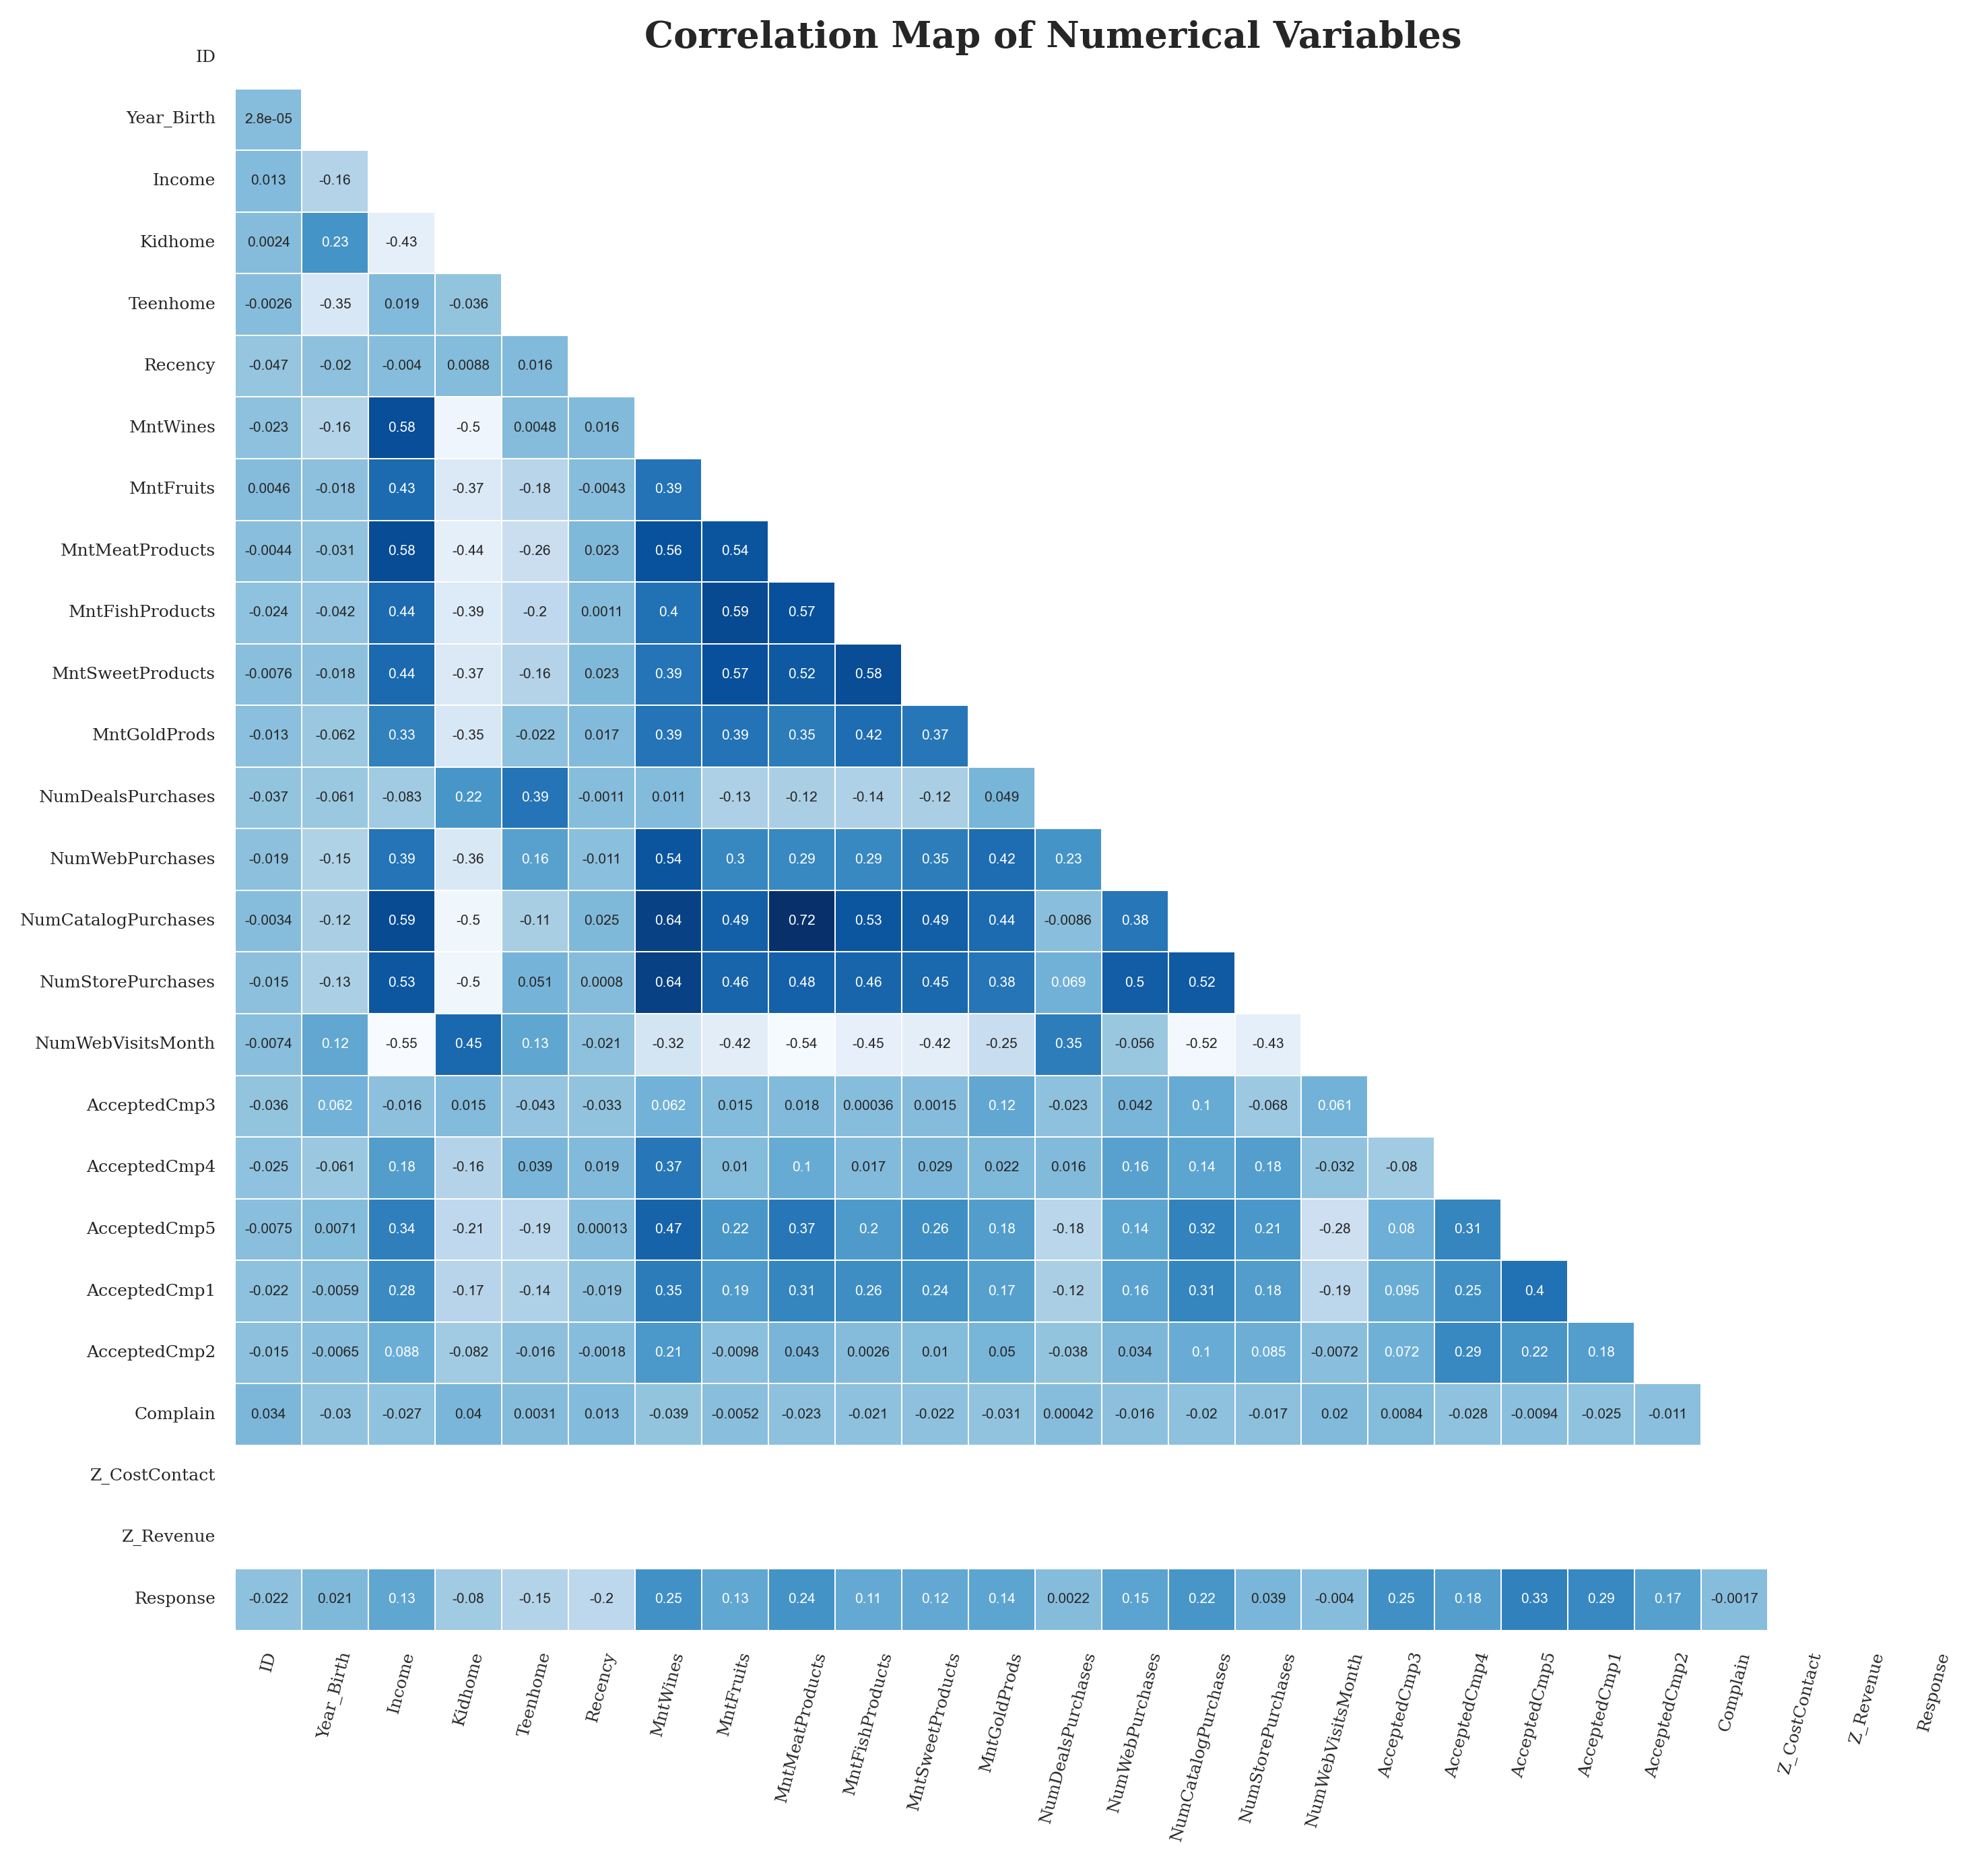

In [246]:
# --- Correlation Map (Heatmap) ---

# Create a boolean mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Create a new figure with a single subplot
fig, ax = plt.subplots(figsize=(10,10),dpi =300)

# Draw a heatmap in the subplot, using the mask, and with the specified appearance settings
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size":5})

# Get the current tick locations and labels of the y-axis and x-axis
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()

# Set the x-axis and y-axis labels with specified font size and family
ax.set_xticklabels(xlabels, size=6, fontfamily='serif',rotation = 75)
ax.set_yticklabels(ylabels, size=6, fontfamily='serif')

# Set the main title of the figure
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')

# Adjust the padding of the subplots
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [248]:
#Age of customer today 
pd.set_option('display.max_columns', None)
df["Age"] = 2023-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)
df.head(10)

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   
5  Postgraduate  62513.0        0         1       16    520      42    98   
6      Graduate  55635.0        0         1       34    235      65   164   
7  Postgraduate  33454.0        1         0       32     76      10    56   
8  Postgraduate  30351.0        1         0       19     14       0    24   
9  Postgraduate   5648.0        1         1       68     28       0     6   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88    88                  3                8   
1     2       1     6                  2                1   
2   111      21    42                  1                8   
3    10       3     5                  2                2   
4    46      27    15                  5                5   
5     0      42    14                  2                6   
6    50      49    27                  4                7   
7     3       1    23                  2                4   
8     3       3     2                  1                3   
9     1       1    13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   
5             0             0             0             0         0         0   
6             0             0             0             0         0         0   
7             0             0             0             0         0         0   
8             0             0             0             0         0         1   
9             0             0             0             0         0         0   

   Age  Spent Living_With  Children  Family_Size  Is_Parent  
0   66   1617       Alone         0            1          0  
1   69     27       Alone         2            3          1  
2   58    776     Partner         0            2          0  
3   39     53     Partner         1            3          1  
4   42    422     Partner         1            3          1  
5   56    716     Partner         1            3          1  
6   52    590       Alone         1            2          1  
7   38    169     Partner         1            3          1  
8   49     46     Partner         1            3          1  
9   73     49     Partner         2            4          1

In [249]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

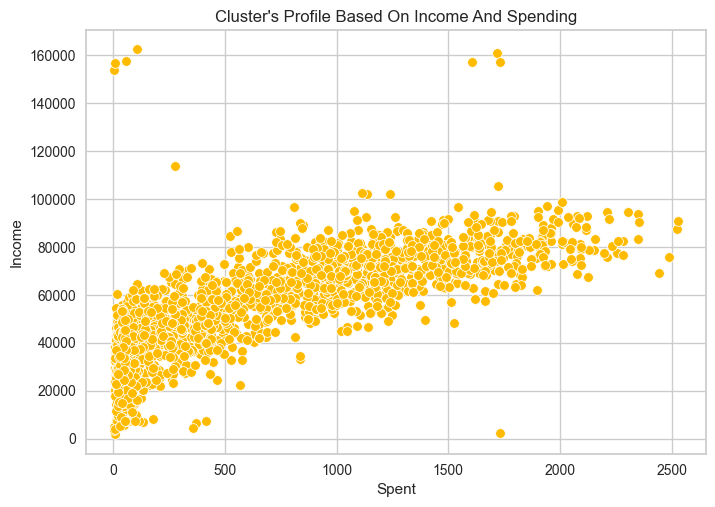

In [250]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.show()

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [252]:
from sklearn.preprocessing import LabelEncoder
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

Categorical variables in the dataset: ['Education', 'Living_With']
All features are now numerical


In [253]:
df.head(20)

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0           0  58138.0        0         0       58    635      88   546   172   
1           0  46344.0        1         1       38     11       1     6     2   
2           0  71613.0        0         0       26    426      49   127   111   
3           0  26646.0        1         0       26     11       4    20    10   
4           1  58293.0        1         0       94    173      43   118    46   
5           1  62513.0        0         1       16    520      42    98     0   
6           0  55635.0        0         1       34    235      65   164    50   
7           1  33454.0        1         0       32     76      10    56     3   
8           1  30351.0        1         0       19     14       0    24     3   
9           1   5648.0        1         1       68     28       0     6     1   
11          2   7500.0        0         0       59      6      16    11    11   
12          0  63033.0        0         0       82    194      61   480   225   
13          1  59354.0        1         1       53    233       2    53     3   
14          0  17323.0        0         0       38      3      14    17     6   
15          1  82800.0        0         0       23   1006      22   115    59   
16          0  41850.0        1         1       51     53       5    19     2   
17          0  37760.0        0         0       20     84       5    38   150   
18          1  76995.0        0         1       91   1012      80   498     0   
19          2  33812.0        1         0       86      4      17    19    30   
20          0  37040.0        0         0       41     86       2    73    69   

    Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0       88    88                  3                8                   10   
1        1     6                  2                1                    1   
2       21    42                  1                8                    2   
3        3     5                  2                2                    0   
4       27    15                  5                5                    3   
5       42    14                  2                6                    4   
6       49    27                  4                7                    3   
7        1    23                  2                4                    0   
8        3     2                  1                3                    0   
9        1    13                  1                1                    0   
11       1    16                  1                2                    0   
12     112    30                  1                3                    4   
13       5    14                  3                6                    1   
14       1     5                  1                1                    0   
15      68    45                  1                7                    6   
16      13     4                  3                3                    0   
17      12    28                  2                4                    1   
18      16   176                  2               11                    4   
19      24    39                  2                2                    1   
20      38    48                  1                4                    2   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                   4                  7             0             0   
1                   2                  5             0             0   
2                  10                  4             0             0   
3                   4                  6             0             0   
4                   6                  5             0             0   
5                  10                  6             0             0   
6                   7                  6             0             0   
7                   4                  8             0             0   
8                   2               

In [254]:
from sklearn.preprocessing import StandardScaler
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
X = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")


All features are now scaled


In [255]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   float64
 3   Teenhome             2212 non-null   float64
 4   Recency              2212 non-null   float64
 5   Wines                2212 non-null   float64
 6   Fruits               2212 non-null   float64
 7   Meat                 2212 non-null   float64
 8   Fish                 2212 non-null   float64
 9   Sweets               2212 non-null   float64
 10  Gold                 2212 non-null   float64
 11  NumDealsPurchases    2212 non-null   float64
 12  NumWebPurchases      2212 non-null   float64
 13  NumCatalogPurchases  2212 non-null   float64
 14  NumStorePurchases    2212 non-null   float64
 15  NumWebVisitsMonth    2212 non-null   f

In [256]:
from sklearn.neighbors import NearestNeighbors
from math import isnan
from random import sample
from numpy.random import uniform
import pandas as pd

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_sample = pd.DataFrame(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), columns=X.columns)
        u_dist, _ = nbrs.kneighbors(u_sample, 2, return_distance=True)
        ujd.append(u_dist[0][1])

        w_sample = pd.DataFrame([X.iloc[rand_X[j]].values], columns=X.columns)
        w_dist, _ = nbrs.kneighbors(w_sample, 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

# --- Perform Hopkins Test ---
hopkins_value = hopkins(X)
hopkins_result = 'Result: ''{:.4f}'.format(hopkins_value)

print(hopkins_result)
if  0.7 < hopkins_value < 0.99:
    print('>> From the result above it has a high tendency to cluster (contains meaningful clusters)')
    print(' Conclusions: Accept H0 ')
else:
    print('>> From the result above it has no meaningful clusters')
    print(' Conclusions: Reject H0')


Result: 0.8495
>> From the result above it has a high tendency to cluster (contains meaningful clusters)
 Conclusions: Accept H0 


In [257]:
from sklearn.decomposition import PCA

# --- Transform into Array ---
X = np.asarray(X)

# --- Applying PCA ---
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

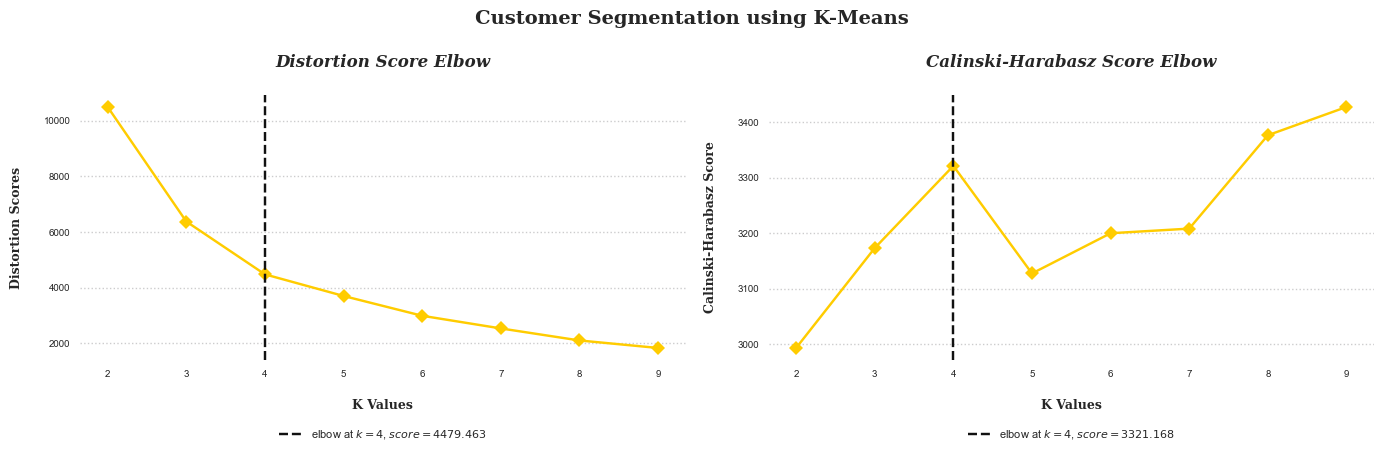

In [258]:
import yellowbrick
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap
# --- Define K-Means Functions ---
def kmeans():
    
    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # --- Elbow Score ---
    elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500,n_init=10), k=(2, 10),  timings=False,ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values():
        spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500,n_init=10), k=(2, 10), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)
    
    plt.suptitle('Customer Segmentation using K-Means', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show

# --- Calling K-Means Functions ---
kmeans()

In [259]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500,n_init=5)
y_kmeans = kmeans.fit_predict(X)
unique, counts = np.unique(y_kmeans, return_counts=True)
unique, counts


(array([0, 1, 2, 3], dtype=int32), array([574, 498, 506, 634]))

In [260]:
df_waffle = dict(zip(unique, counts))
df_waffle

{0: 574, 1: 498, 2: 506, 3: 634}

In [261]:
total = sum(df_waffle.values())
total

2212

In [262]:
wfl_square = {key: value/100 for key, value in df_waffle.items()}
wfl_square

{0: 5.74, 1: 4.98, 2: 5.06, 3: 6.34}

/var/folders/z8/5j47p9y55kv1_ngl2nr5fkhc0000gn/T/ipykernel_25428/3438515939.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3=plt.subplot(2, 2, (3,4))


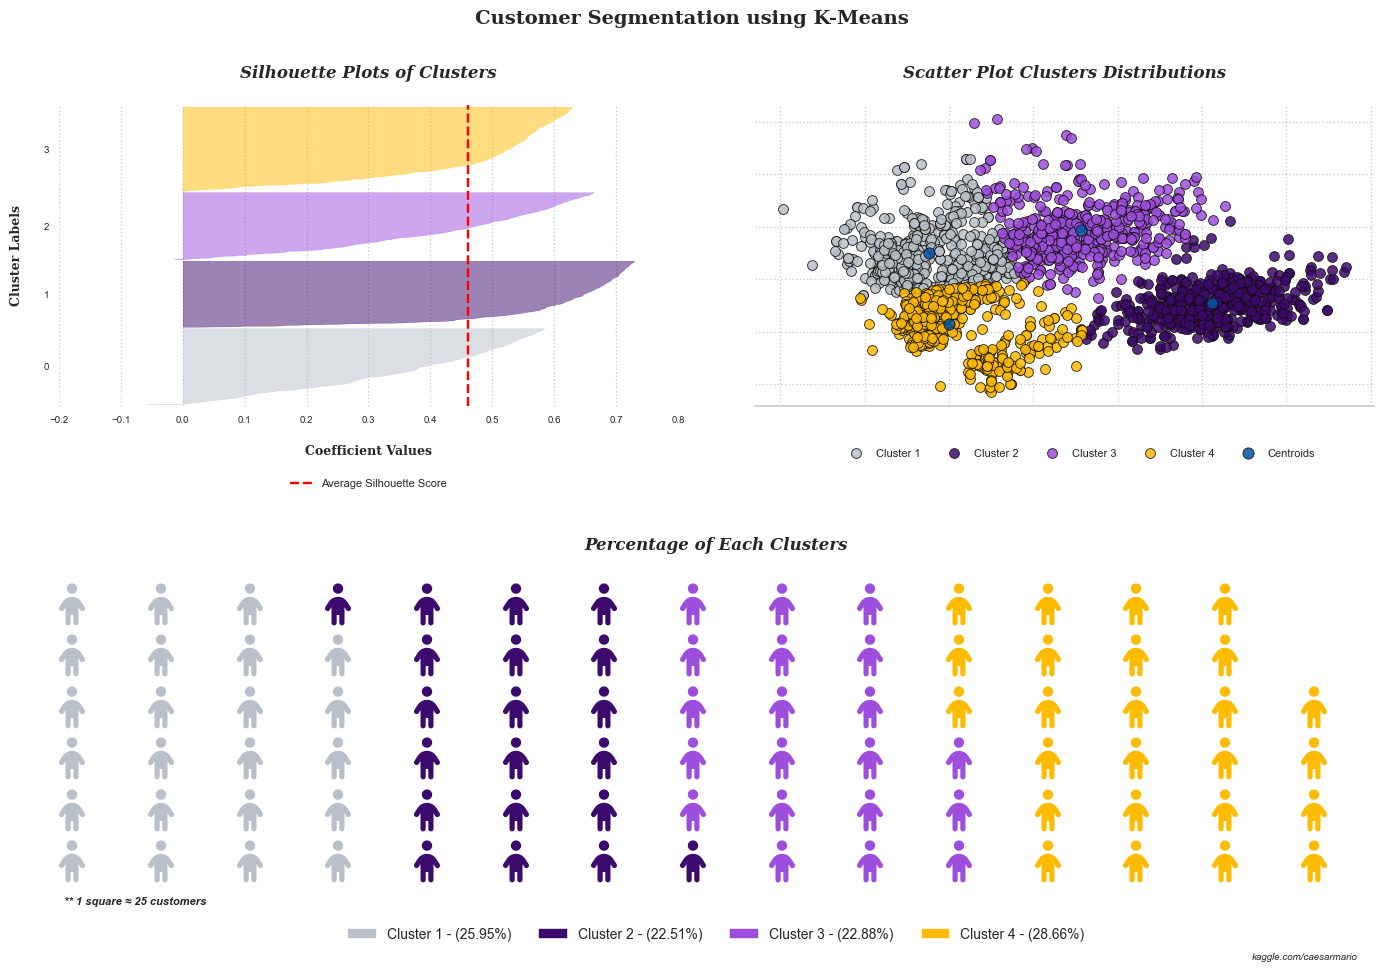

In [263]:
from pywaffle import Waffle

# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500,n_init=5)
y_kmeans = kmeans.fit_predict(X)
    
# --- Define K-Means Visualizer & Plots ---
def visualizer(kmeans, y_kmeans):
    
    # --- Figures Settings ---
    cluster_colors=['#B9C0C9', '#3C096C', '#9D4EDD', '#FFBB00']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
    
    # --- Silhouette Plots ---
    s_viz = SilhouetteVisualizer(kmeans, ax=ax1, colors=cluster_colors)
    s_viz.fit(X)
    s_viz.finalize()
    s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)
    s_viz.ax.tick_params(labelsize=7)
    for text in s_viz.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in s_viz.ax.spines.values():
        spine.set_color('None')
    s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **legend_style)
    s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    s_viz.ax.grid(axis='y', alpha=0)
    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)
        
    # --- Clusters Distribution ---
    y_kmeans_labels = list(set(y_kmeans.tolist()))
    for i in y_kmeans_labels:
        ax2.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
    for spine in ax2.spines.values():
        spine.set_color('None')
    ax2.set_title('Scatter Plot Clusters Distributions\n', **title)
    ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
    ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['bottom'].set_color('#CAC9CD')
    
    # --- Waffle Chart ---
    unique, counts = np.unique(y_kmeans, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/25 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, colors=cluster_colors, 
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30, 
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2, 
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 25 customers', weight = 'bold', style='italic', fontsize=8)
    
    # --- Suptitle & WM ---
    plt.suptitle('Customer Segmentation using K-Means\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show()
    
# --- Calling K-Means Functions ---
visualizer(kmeans, y_kmeans)

In [264]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('Evaluate Clustering Quality :.')
    print('Davies-Bouldin Index: ' ,db_index)
    print(' Silhouette Score: ', s_score)
    print(' Calinski Harabasz Index: ', ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

Evaluate Clustering Quality :.
Davies-Bouldin Index:  0.782
 Silhouette Score:  0.461
 Calinski Harabasz Index:  3321.168


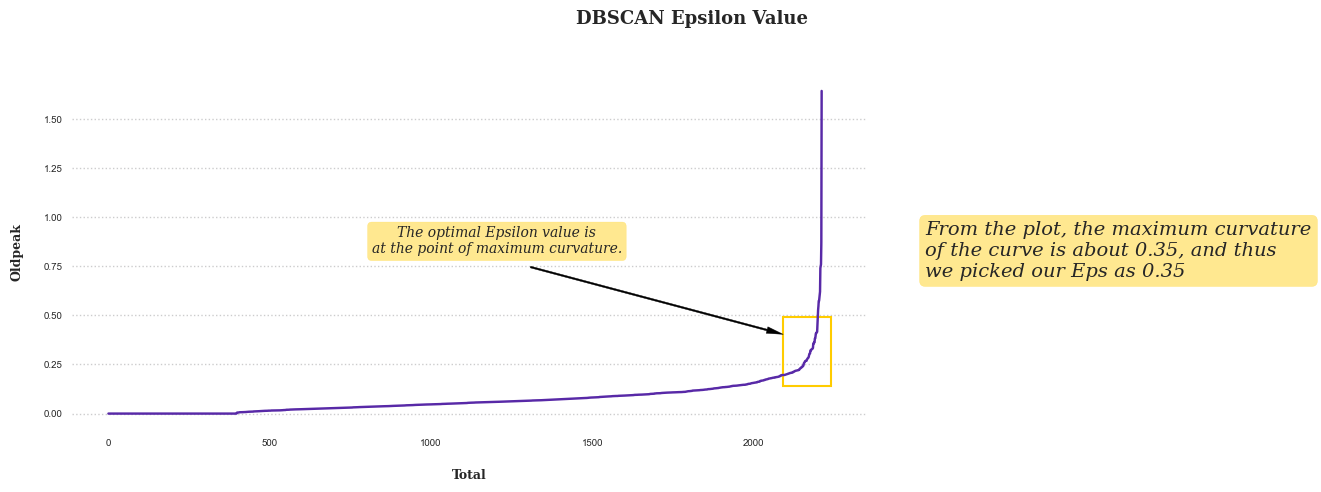

In [265]:
from matplotlib.patches import Rectangle
# --- Define Epsilon Values ---
def epsilon():
    
    # --- Calculate Nearest Neighbors ---
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(X)
    distances, indices=nbrs.kneighbors(X)
    distances=np.sort(distances, axis = 0)
    
    # --- Figure Settings ---
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
    kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig=plt.figure(figsize=(14, 5))
    
    # --- Epsilon Plot ---
    distances_1=distances[:, 1]
    ax1=fig.add_subplot(1, 3, (1, 2))
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('\nTotal', fontsize=9, **text_style)
    plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
    ax1.add_patch(Rectangle((2090, 0.14), 150, 0.35, edgecolor='#FFCC00', fill=False, lw=1.5))
    plt.annotate('The optimal Epsilon value is\nat the point of maximum curvature.', xy=(1200, 0.87), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
    plt.annotate('', xy=(2100, 0.4), xytext=(1300, 0.75), arrowprops=kw)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    plt.tick_params(labelsize=7)
        # --- Explanations ---
    ax2=fig.add_subplot(1, 3, 3)
    plt.annotate('From the plot, the maximum curvature\nof the curve is about 0.35, and thus\nwe picked our Eps as 0.35', xy=(0.1, 0.5), xytext=(1, 1), fontsize=14, bbox=bbox, **txt2)
    for spine in ax2.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.axis('off')
    
    plt.suptitle('DBSCAN Epsilon Value\n', fontsize=13, **text_style)
    plt.tight_layout()
    plt.show

# --- Calling Epsilon Functions ---
epsilon()

In [266]:
import numpy as np

# fit_predict your data
dbscan = DBSCAN(eps=0.35, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

# get the labels (clusters) from the model
labels = dbscan.labels_

# count the number of unique labels (excluding noise if present)
n_clusters = len(np.unique(labels[labels != -1]))

print('Number of clusters: {}'.format(n_clusters))


Number of clusters: 8


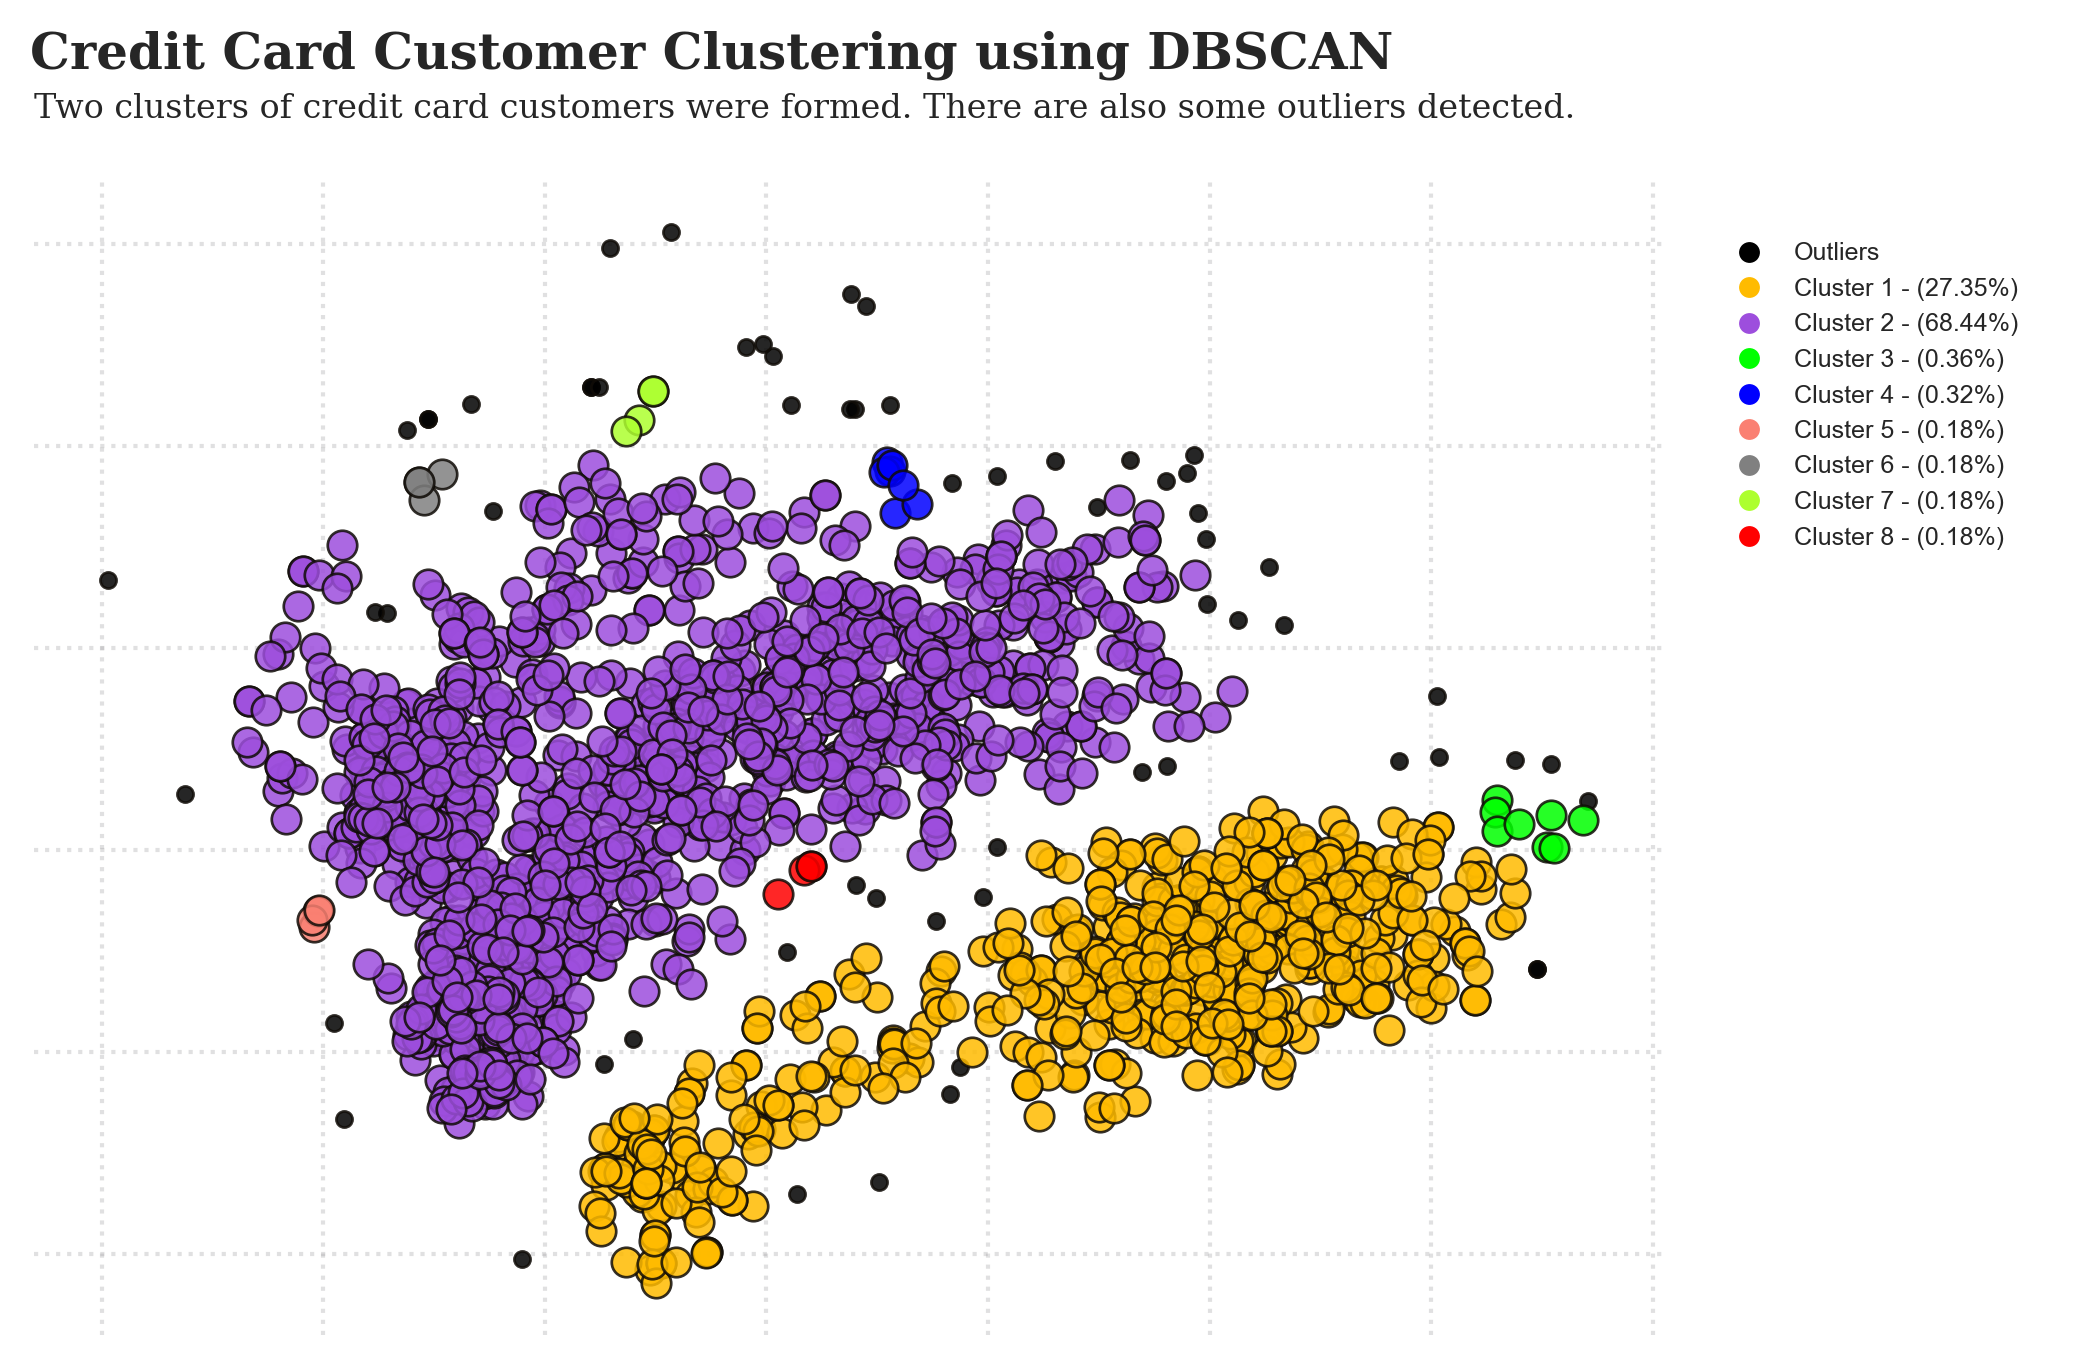

In [267]:
from matplotlib.lines import Line2D

# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=0.35, min_samples=4)
y_dbscan = dbscan.fit_predict(X)
    
# --- Define DBSCAN Result Distribution ---
def dbscan_visualizer(dbscan, y_dbscan):
    
    # --- Figures Settings ---
    cluster_colors = ['#FFBB00', '#9D4EDD', '#00FF00', '#0000FF', '#FA8072', '#808080', '#ADFF2F', 'red', 'black']
    suptitle=dict(fontsize=12, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=8, fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    legend_style=dict(borderpad=2, frameon=False, fontsize=6)
    
    # --- Arrow Settings ---
    style = 'Simple, tail_width=0.3, head_width=3, head_length=5'
    kw = dict(arrowstyle=style, color='#3E3B39')
    
    # --- Percentage labels ---
    unique, counts = np.unique(y_dbscan, return_counts=True)
    dbscan_count = dict(zip(unique, counts))
    total = sum(dbscan_count.values())
    dbscan_label = {key: round(value/total*100, 2) for key, value in dbscan_count.items() if key != -1}

    # --- Clusters Distribution ---
    fig, ax = plt.subplots(1, 1, figsize=(7, 5),dpi=300)
    unique_labels = np.unique(y_dbscan)
    legend_elements = []
    for label in unique_labels:
        if label == -1:  # outliers
            plt.scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1], s=15, c=cluster_colors[-1], **scatter_style)
            legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[-1], markersize=5, label='Outliers'))
        else:  # regular clusters
            plt.scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1], s=50, c=cluster_colors[label], **scatter_style)
            legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[label], markersize=5, label=f'Cluster {label+1} - ({dbscan_label[label]}%)'))

    ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), **legend_style)

    for spine in ax.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    plt.annotate('Outliers', xy=(23, 18.8), xytext=(1, 1), fontsize=8, bbox=bbox, **txt)
    plt.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Two clusters of credit card customers were formed. There are also some outliers detected.\n', loc='left', **title)
    plt.suptitle('Credit Card Customer Clustering using DBSCAN', x=0.123, y=0.98, ha='left', **suptitle)
    plt.show()
    
# --- Calling DBSCAN Functions ---
dbscan_visualizer(dbscan, y_dbscan);


In [268]:
# --- Evaluate DBSCAN Cluster Quality ---
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

Evaluate Clustering Quality :.
Davies-Bouldin Index:  1.56
 Silhouette Score:  -0.288
 Calinski Harabasz Index:  224.921


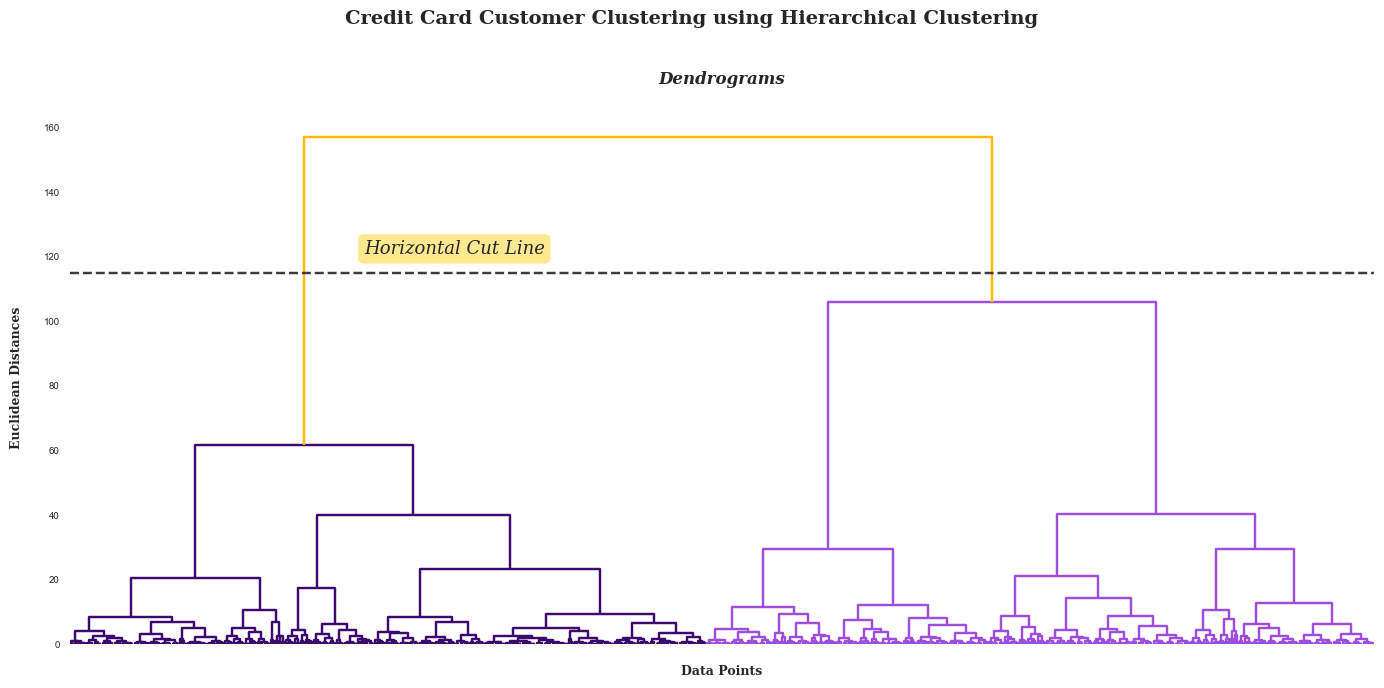

In [275]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
from seaborn import set_palette

def agg_dendrogram():
    
    # Define and set color palette
    color_palette = ['#FFBB00', '#3C096C', '#9D4EDD', '#3C096C']
    set_palette(color_palette)
    
    # Define styles for plot elements
    text_style = dict(fontweight='bold', fontfamily='serif')
    ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)

    # Initialize plot
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot()
    
    # Generate dendrogram
    dend = shc.dendrogram(shc.linkage(X, method='ward', metric='euclidean'))
    
    # Add visual elements to plot
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, **text_style)
    plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
    plt.annotate('Horizontal Cut Line', xy=(6500, 122), xytext=(1, 1), fontsize=13, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=7)
    plt.title('Dendrograms\n', **title)
    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Call function
agg_dendrogram()


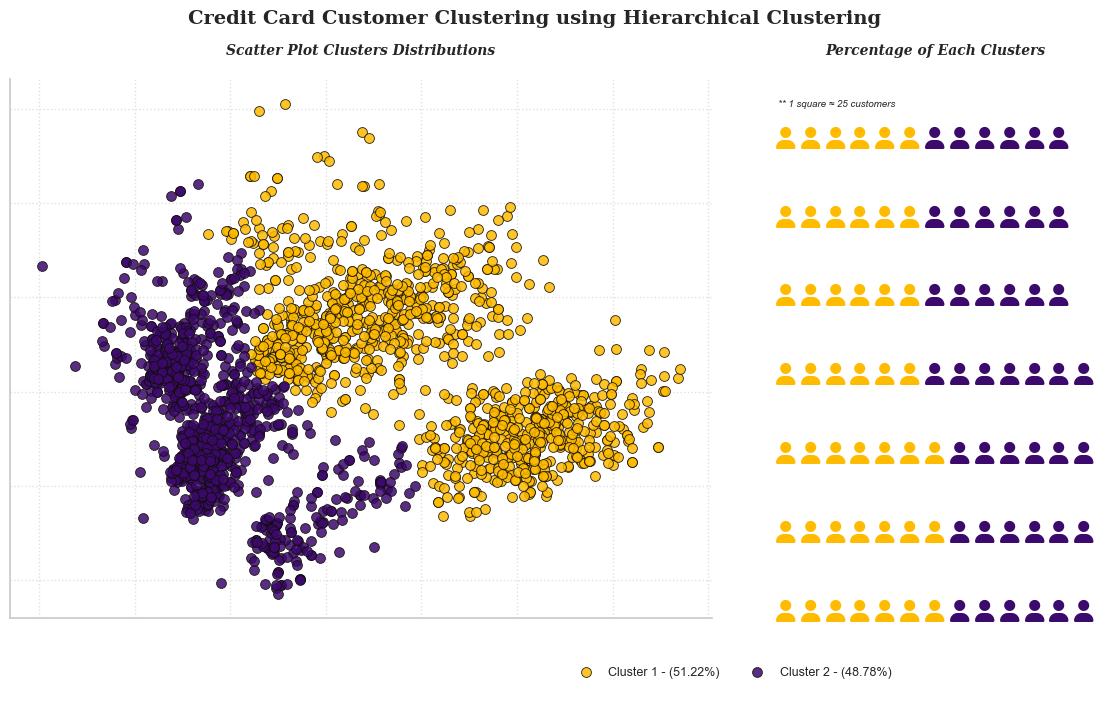

In [279]:
# --- Implementing Hierarchical Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)
    
# --- Define Hierarchical Clustering Distributions ---
def agg_visualizer(agg_cluster, y_agg_cluster):
    
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C']
    labels = ['Cluster 1', 'Cluster 2']
    suptitle=dict(fontsize=14, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=9)
    fig=plt.figure(figsize=(14, 7))
    
    # --- Percentage Labels ---
    unique, counts = np.unique(y_agg_cluster, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/25 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    # --- Clusters Distribution ---
    y_agg_labels = list(set(y_agg_cluster.tolist()))
    ax1=fig.add_subplot(1, 3, (1, 2))
    for i in y_agg_labels:
        ax1.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    for spine in ax1.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_color('#CAC9CD')
    ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
    ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Scatter Plot Clusters Distributions\n', **title)
    
    # --- Waffle Chart ---
    ax2=fig.add_subplot(1, 3, 3)
    ax2.set_title('Percentage of Each Clusters\n', **title)
    ax2.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax2, rows=7, values=wfl_square, colors=cluster_colors, icons='user', icon_size=16)
    ax2.get_legend().remove()
    ax2.text(0.01, 0.95, '** 1 square ≈ 25 customers', style='italic', fontsize=7)
    
    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', **suptitle)
    plt.show()
    
# --- Calling Hierarchical Clustering Functions ---
agg_visualizer(agg_cluster, y_agg_cluster);

In [280]:
# --- Evaluate DBSCAN Cluster Quality ---
db_agg, ss_agg, ch_agg = evaluate_clustering(X, y_agg_cluster)

Evaluate Clustering Quality :.
Davies-Bouldin Index:  0.884
 Silhouette Score:  0.441
 Calinski Harabasz Index:  2203.244


In [285]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_dbscan, ss_agg],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan, ch_agg]})

# --- Create Accuracy Comparison Table ---
print(' Model Accuracy Comparison: ')

compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='Blues').hide(axis="index").set_properties(**{'font-family': 'Segoe UI'})

 Model Accuracy Comparison: 


In [271]:
# --- Add K-Means Prediction to Data Frame ----
df['cluster_result'] = y_kmeans+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.hide(axis="index")
